In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

from sklearn.linear_model import Ridge, ElasticNet, ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import enet_path

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb
object = StandardScaler()


In [2]:
df = pd.read_excel('Zmb_Social_media_dataset.xlsx')
df

,wealth_index,all_population_count_2015,annual_precipitation_2015,aridity_2015,built_population_2014,day_land_surface_temp_2015,diurnal_temperature_range_2015,drought_episodes,enhanced_vegetation_index_2015,frost_days_2015,...,CENTRAL,COPPERBELT,EASTERN,LUAPULA,LUSAKA,MUCHINGA,NORTHERN,NORTHWESTERN,SOUTHERN,WESTERN
0,1.541667,15413.10,68.7000,17.28300,0.000026,32.1875,12.9917,5,3152.7,0.000000,...,0,0,1,0,0,0,0,0,0,0
1,2.173913,7093.53,79.6667,21.87640,0.007313,28.2772,14.2167,9,3402.0,0.042500,...,0,1,0,0,0,0,0,0,0,0
2,2.840000,162.15,82.0667,22.23020,-9999.000000,-9999.0000,11.6167,4,-9999.0,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,5.000000,28552.40,59.8500,15.71550,0.472284,31.9700,14.8250,9,2585.0,0.040833,...,1,0,0,0,0,0,0,0,0,0
4,1.125000,1972.73,87.7583,24.43390,0.000000,28.3157,13.3583,9,3527.0,0.000000,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,4.666667,116188.00,24.6083,6.25636,0.530353,30.1700,14.0750,5,2560.0,0.014167,...,0,0,0,0,1,0,0,0,0,0
531,1.523810,6623.06,58.2917,15.40750,0.000091,33.9245,12.1833,7,3010.6,0.000000,...,0,0,0,0,0,1,0,0,0,0
532,3.291667,15832.40,23.2417,5.77433,0.011310,31.0267,14.1500,5,3003.4,0.020833,...,0,0,0,0,1,0,0,0,0,0
533,1.541667,1998.33,87.8833,24.46870,0.000000,28.9911,13.1917,5,3483.0,0.000000,...,1,0,0,0,0,0,0,0,0,0


In [3]:
target1=['count_id_10k','mean_gov_policy4_10k','mean_election_corruption9_10k','mean_public_health16_10k','mean_social_inequality18_10k','mean_food_system22_10k','mean_social_progress61_10k','mean_mining66_10k']

In [4]:
df=df.dropna()
df

,wealth_index,all_population_count_2015,annual_precipitation_2015,aridity_2015,built_population_2014,day_land_surface_temp_2015,diurnal_temperature_range_2015,drought_episodes,enhanced_vegetation_index_2015,frost_days_2015,...,CENTRAL,COPPERBELT,EASTERN,LUAPULA,LUSAKA,MUCHINGA,NORTHERN,NORTHWESTERN,SOUTHERN,WESTERN
1,2.173913,7093.53,79.6667,21.87640,0.007313,28.2772,14.2167,9,3402.00,0.042500,...,0,1,0,0,0,0,0,0,0,0
2,2.840000,162.15,82.0667,22.23020,-9999.000000,-9999.0000,11.6167,4,-9999.00,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,5.000000,28552.40,59.8500,15.71550,0.472284,31.9700,14.8250,9,2585.00,0.040833,...,1,0,0,0,0,0,0,0,0,0
5,3.857143,11525.80,58.7000,16.38140,0.216761,30.8133,11.8750,7,3026.00,0.000000,...,0,0,0,0,0,1,0,0,0,0
6,4.416667,3711.09,28.1917,6.41935,0.008124,30.5433,13.3750,5,2305.00,0.000000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,3.320000,16100.80,24.6083,6.25636,0.027686,32.3006,14.0750,5,3003.08,0.014167,...,0,0,0,0,1,0,0,0,0,0
528,2.217391,9133.18,39.0833,10.19570,0.000000,33.5124,15.5167,5,2516.42,0.446667,...,0,0,0,0,0,0,0,0,1,0
529,4.750000,126717.00,24.6083,6.25636,0.595757,31.3400,14.0750,5,2271.00,0.014167,...,0,0,0,0,1,0,0,0,0,0
530,4.666667,116188.00,24.6083,6.25636,0.530353,30.1700,14.0750,5,2560.00,0.014167,...,0,0,0,0,1,0,0,0,0,0


In [5]:
train_ix, test_ix = train_test_split(range(df.shape[0]), test_size = 0.2, random_state = 48)

In [6]:
def ridge(df1,columns,target):
    rdf1=pd.DataFrame(columns=['name','ridge_alpha','R2', 'adj_R2','mean val MSE','test MSE','test MAE']+columns)
    x = df1[:, 1:]
    y = df1[:,0]
    coefs=[]
    X_train = df1[train_ix, 1:]
    X_test = df1[test_ix, 1:]
    y_train = df1[train_ix,0] 
    y_test = df1[test_ix,0]

    for ridge_alpha in float(10)**np.arange(-6, 5):
        sample_size = len(y)
        kf = KFold(n_splits=10, shuffle=True)
        MSE_kf = 0
        for train_index, val_index in kf.split(X_train):
            # Ridge
            ridge_solver = 'cholesky'

            X_train_t=X_train[train_index]
            y_train_t=y_train[train_index]        
            X_train_v=X_train[val_index]
            y_train_v=y_train[val_index]

            clf = Ridge(alpha=ridge_alpha,fit_intercept=True,normalize='deprecated',copy_X=True, max_iter=1000, tol=0.001, solver=ridge_solver)
            clf.fit(X_train_t, y_train_t)
            coefs.append(clf.coef_)
            MSE_kf += mean_squared_error(y_train_v, clf.predict(X_train_v))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Rsq = r2_score(y_test, y_pred)
        evaluation_dict = {'name':f'Ridge_Model PCA: {target}','ridge_alpha':ridge_alpha,'R2':r2_score(y_test, y_pred), 'adj_R2': 1-(1-Rsq)*(len(y_train)-1)/(len(y_train)-x.shape[1]-1), 
                            'mean val MSE' : MSE_kf/10, 'test MSE' : mean_squared_error(y_test, y_pred), 
                            'test MAE' : mean_absolute_error(y_test, y_pred)
                            }
        
        for i in range(len(columns)):
                    evaluation_dict[columns[i]] = clf.coef_[i] 

        ridge_evaluation_df = pd.DataFrame.from_dict(data = evaluation_dict, orient='index').T
        rdf1=pd.concat([rdf1, ridge_evaluation_df], axis=0)
    rdf1=rdf1.sort_values(by=['mean val MSE'])
    return rdf1


In [7]:
def enet(df1,columns,target):
    edf1=pd.DataFrame(columns=['name','elastic_net_alpha','elastic_net_l1_ratio' ,'R2','adj_R2','mean val MSE','test MSE','test MAE']+columns)
    elastic_net_l1_ratio = 0.1
    x = df1[:, 1:]
    y = df1[:,0]
    X_train = df1[train_ix, 1:]
    X_test = df1[test_ix, 1:]
    y_train = df1[train_ix,0] 
    y_test = df1[test_ix,0]
    while elastic_net_l1_ratio<=1:
        eps = 5e-3  # the smaller it is the longer is the path
        alphas_enet, coefs_enet, _ = enet_path(x, y, eps=eps, l1_ratio=elastic_net_l1_ratio)
        for elastic_net_alpha in alphas_enet:
            kf = KFold(n_splits=10, shuffle=True)
            MSE_kf = 0
            for train_index, val_index in kf.split(X_train):
                X_train_t=X_train[train_index]
                y_train_t=y_train[train_index]        
                X_train_v=X_train[val_index]
                y_train_v=y_train[val_index]
                clf = ElasticNet(alpha=elastic_net_alpha, l1_ratio=elastic_net_l1_ratio, fit_intercept=True, precompute=False, 
                                max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, 
                                selection='cyclic')
                clf.fit(X_train_t, y_train_t)
                MSE_kf += mean_squared_error(y_train_v, clf.predict(X_train_v))
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # pred_df = pd.DataFrame(data=[y_pred, y_test]).T
            # pred_df.columns=[f'predicted_{target}',target]
            # pred_df['error_per_obs'] = pred_df[target] - pred_df[f'predicted_{target}']
            Rsq = r2_score(y_test, y_pred)
            evaluation_dict = {'name':f'ENet_Model PCA: {target}','elastic_net_alpha':elastic_net_alpha,'elastic_net_l1_ratio':elastic_net_l1_ratio ,
                                'R2':r2_score(y_test, y_pred),'adj_R2': 1-(1-Rsq)*(len(y_train)-1)/(len(y_train)-x.shape[1]-1), 
                                'mean val MSE' : MSE_kf/10, 'test MSE' : mean_squared_error(y_test, y_pred), 
                                'test MAE' : mean_absolute_error(y_test, y_pred)}
            
            for i in range (len(columns)):
                evaluation_dict[columns[i]] = clf.coef_[i] 
            
            enet_evaluation_df = pd.DataFrame.from_dict(data = evaluation_dict, orient='index').T
            edf1=pd.concat([edf1, enet_evaluation_df], axis=0)
        elastic_net_l1_ratio+=0.1
    edf1=edf1.sort_values(by=['mean val MSE'])
    return edf1

In [8]:
def random_search(df1_1,columns,target):
    n_folds = 10  
    grid = {'n_estimators': [49, 100, 500, 1000],
            'learning_rate': [0.01, 0.05, 0.1], # default 0.1
            'max_depth': [3, 5, 7],  # default 3
            'min_child_weight': [1, 3, 5],
            'gamma': [0.0, 0.1, 0.2],
            'subsample': [0.5, 0.7],
            'colsample_bytree': [0.5, 0.7]
            }

    x = df1_1[:, 1:]
    y = df1_1[:,0]
    X_train =df1_1[train_ix, 1:]
    X_test = df1_1[test_ix, 1:]
    y_train = df1_1[train_ix,0] 
    y_test = df1_1[test_ix,0]

    model = xgb.XGBRegressor()
    search = RandomizedSearchCV(model, grid, scoring='neg_mean_squared_error', n_jobs=-1)

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    results = search.fit(X_train, y_train)
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
    }
    num_boost_round = results.best_params_['n_estimators'] 
    params['subsample'] = results.best_params_['subsample']
    params['min_child_weight'] = results.best_params_['min_child_weight']
    params['max_depth'] = results.best_params_['max_depth']
    params['learning_rate'] = results.best_params_['learning_rate']
    params['gamma'] = results.best_params_['gamma']
    params['colsample_bytree'] = results.best_params_['colsample_bytree']

    cv_results = xgb.cv(params, dtrain, num_boost_round=num_boost_round, nfold=n_folds, metrics='rmse', seed=42)
    rmse_mean = cv_results['test-rmse-mean']
    avg_rmse = sum(rmse_mean) / num_boost_round
    mse_mean = [rmse**2 for rmse in rmse_mean]
    avg_mse = sum(mse_mean) / num_boost_round

    model = xgb.train(params, dtrain, num_boost_round=100)

    y_pred = model.predict(dtest)
    
    Rsq = r2_score(y_test, y_pred)
    features=columns
    ax=xgb.plot_importance(model, importance_type='weight')
    labels = [item.get_text() for item in ax.get_yticklabels()]
    for i in range(len(labels)):
        labels[i] = features[i]
        
    # ax.set_yticklabels(labels)    
    importance_gain = model.get_score(importance_type='gain')
    imp=importance_gain.values()
    imp=list(imp)
    print(importance_gain)
    importance_weight = model.get_score(importance_type='weight') # weight is default, you can try "gain" or "cover"
    print(importance_weight)
    xgn1_1=pd.DataFrame(columns=['name','num_boost_round','subsample','min_child_weight','max_depth','learning_rate','gamma','colsample_bytree','R2', 'adj_R2','Avg RMSE','mean val MSE','test MSE','test MAE'])
    evaluation_dict = {'name':f'xgn_Model Random PCA: {target}','num_boost_round':num_boost_round,'subsample':params['subsample'],'min_child_weight':params['min_child_weight'],'max_depth':params['max_depth'],'learning_rate':params['learning_rate'],'gamma':params['gamma'],'colsample_bytree':params['colsample_bytree'],'R2':r2_score(y_test, y_pred), 'adj_R2': 1-(1-Rsq)*(len(y_train)-1)/(len(y_train)-x.shape[1]-1), 
                       'Avg RMSE':avg_rmse,'mean val MSE' :avg_mse, 'test MSE' : mean_squared_error(y_test, y_pred), 'test MAE' : mean_absolute_error(y_test, y_pred)
                        }
    sort_dict={}
    for i in range(len(labels)):
      sort_dict[labels[i]] = imp[i] 

    keys = list(sort_dict.keys())
    values = list(sort_dict.values())
    sorted_value_index = np.argsort(values)
    sorted_dict = {keys[i]: values[i] for i in sorted_value_index}     
    res = dict(reversed(list(sorted_dict.items())))
    
    evaluation_dict.update(res) 
                
    ridge_evaluation_df = pd.DataFrame.from_dict(data = evaluation_dict, orient='index').T
    xgn1_1=pd.concat([xgn1_1, ridge_evaluation_df], axis=0)
    return xgn1_1

In [9]:
ridge_res = {}
elnet_res = {}
random_res = {}

In [10]:
pc1=['temperature_april','temperature_march','temperature_may','temperature_february','temperature_january']
pc2=['aridity_2015','annual_precipitation_2015','wet_days_2015','rainfall_2015','itn_coverage_2015']
pc3=['enhanced_vegetation_index_2015','night_land_surface_temp_2015','land_surface_temperature_2015','day_land_surface_temp_2015','built_population_2014']
pc4=['diurnal_temperature_range_2015','frost_days_2015','maximum_temperature_2015','un_population_density_2015','u5_population_2015']
pc5=['livestock_pigs','livestock_chickens','proximity_to_national_borders','COPPERBELT','livestock_sheep']

# pca6=pca1+pca2
# pca7=pca1+pca2+pca3
# pca8=pca1+pca2+pca3+pca4
# pca9=pca1+pca2+pca3+pca4+pca5

In [11]:
feats=[pc5]
n=['pc5']

count_id_10k
{'f0': 6.023412227630615, 'f1': 2.674865245819092, 'f2': 2.5394365787506104, 'f3': 1.8106231689453125, 'f4': 2.5263113975524902}
{'f0': 130.0, 'f1': 160.0, 'f2': 171.0, 'f3': 36.0, 'f4': 110.0}
mean_gov_policy4_10k
{'f0': 13.610583305358887, 'f1': 12.98664379119873, 'f2': 19.906286239624023, 'f3': 0.10486350953578949, 'f4': 23.426380157470703}
{'f0': 53.0, 'f1': 102.0, 'f2': 25.0, 'f3': 7.0, 'f4': 101.0}
mean_election_corruption9_10k
{'f0': 20.036540985107422, 'f1': 11.932912826538086, 'f2': 6.600891590118408, 'f3': 1.2853721380233765, 'f4': 4.750406265258789}
{'f0': 203.0, 'f1': 148.0, 'f2': 141.0, 'f3': 6.0, 'f4': 105.0}
mean_public_health16_10k
{'f0': 1.6447616815567017, 'f1': 0.8344388604164124, 'f2': 1.3994113206863403, 'f3': 0.4748452305793762, 'f4': 1.6120874881744385}
{'f0': 257.0, 'f1': 269.0, 'f2': 270.0, 'f3': 23.0, 'f4': 335.0}
mean_social_inequality18_10k
{'f0': 2.265540361404419, 'f1': 1.5176335573196411, 'f2': 1.8984465599060059, 'f3': 0.7088021636009216, 'f

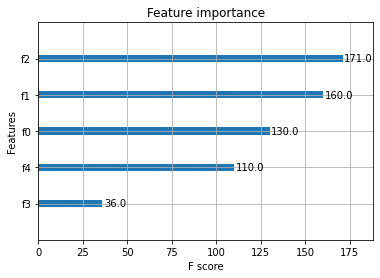

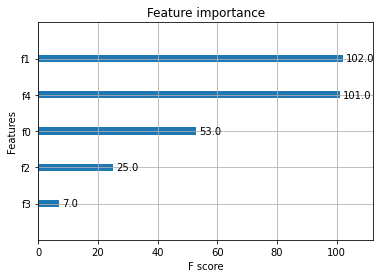

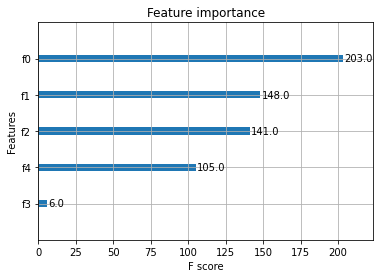

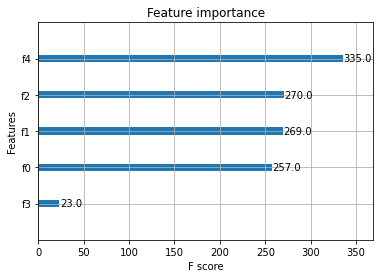

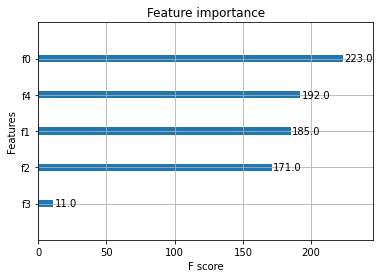

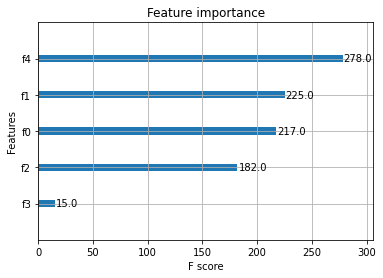

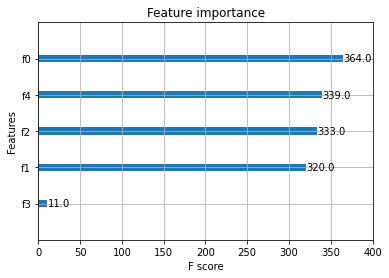

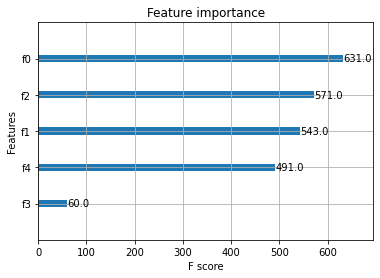

In [12]:
for i in target1:
    print(i)
    c=0
    for j in feats:
        columns = j   
        columns.insert(0,i)
        df1=df[columns]
        columns.remove(i)
        df1=object.fit_transform(df1)
        name= n[c]+'_'+i
        ridge_res[name] = ridge(df1,columns,i)
        elnet_res[name] = enet(df1,columns,i)
        random_res[name] = random_search(df1,columns,i)
        c+=1

In [13]:
with pd.ExcelWriter("Zmb_social_media_PCA_results.xlsx") as writer:
        for mk in elnet_res.keys():
            ridge_res[mk].to_excel(writer, sheet_name="R-{}".format(mk[:25]), index=False)
            elnet_res[mk].to_excel(writer, sheet_name="E-{}".format(mk[:25]), index=False)
            random_res[mk].to_excel(writer, sheet_name="x-{}".format(mk[:25]), index=False)
